In [6]:
import torch
import torchvision.transforms as TT
import matplotlib.pyplot as plt

In [28]:
import torchvision.transforms as TT

def cut_to_mnist(multi_img, merge_points, multi_img_label):
    mnist_images = []
    top_vertical = 0
    top_horizontal = 0
    crop_height = 28
    crop_width = 0
    for mp in merge_points:
        mp = int(mp)
        crop_width = mp - top_horizontal
        cut_image =TT.functional.crop(multi_img, top=top_vertical, left=top_horizontal, height=crop_height, width=crop_width)
        top_horizontal = mp
        # fill or cut the image to 1 x 28 x 28 mnist shape:
        if(crop_width < 28):
            black_fill = torch.zeros([1,28,28 - cut_image.shape[2]])
            img = torch.cat([cut_image, black_fill], dim=2)
        elif(crop_width > 28):
            img = TT.functional.crop(cut_image, top=0, left=0, height=28, width=28)
        
        mnist_images.append(img)
        
    labels = [c for c in str(multi_img_label)]

    return mnist_images, labels

{'multi_img': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 'multi_img_label': '2312', 'merge_points': tensor([21., 45., 67., 93.])}
mr["multi_img"].shape : torch.Size([1, 28, 112])
merge_points: tensor([21., 45., 67., 93.])


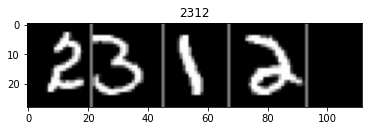

In [8]:
# load example image:
import torchvision.transforms as TT
import matplotlib.pyplot as plt
from PIL import ImageDraw # used to draw lines on an image

mr = torch.load("test4/2312_21_45_67_93.pt")
print(mr)

t_img = mr["multi_img"]
print(f"mr[\"multi_img\"].shape : {t_img.shape}")

merge_points = mr["merge_points"]
print(f"merge_points: {merge_points}")

img = TT.ToPILImage()(mr["multi_img"])
plt.title(mr["multi_img_label"])
draw = ImageDraw.Draw(img)
for mp in merge_points:
    draw.line([(mp, 0), (mp, 28)], width=1, fill=128)
plt.imshow(img, cmap="gray")

cut_image.shape: torch.Size([1, 28, 21])
resized image shape: torch.Size([1, 28, 28])
cut_image.shape: torch.Size([1, 28, 24])
resized image shape: torch.Size([1, 28, 28])
cut_image.shape: torch.Size([1, 28, 22])
resized image shape: torch.Size([1, 28, 28])
cut_image.shape: torch.Size([1, 28, 26])
resized image shape: torch.Size([1, 28, 28])


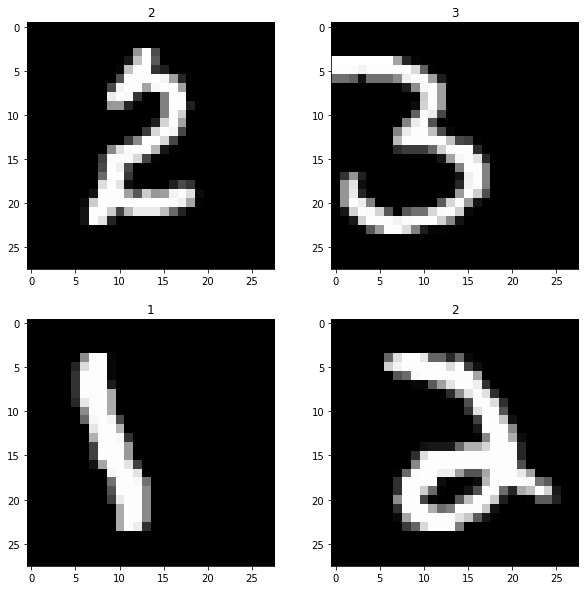

In [29]:
# test cut_to_mnist() by displaying the single images:

import torchvision.transforms as TT
import matplotlib.pyplot as plt

torch_image_record = torch.load("test4/2312_21_45_67_93.pt")
torch_image = torch_image_record["multi_img"]
merge_points = torch_image_record["merge_points"]
multi_img_label = torch_image_record["multi_img_label"]

torch_single_imgs, labels = cut_to_mnist(torch_image, merge_points, multi_img_label)

figure = plt.figure(figsize=(10,10))
rows, cols = 2,2
for i in range(1, cols * rows +1):
    img = torch_single_imgs[i-1]
    label = labels[i-1]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis="off"
    plt.imshow(img.squeeze(), cmap="gray")

In [1]:
#from MultiDigitMnist_functions import SingleDigitMNISTNet
import torch
import MultiDigitMnist_functions as mdf
sys.path.append(".") # add current directory to module-search path - otherwize classes in modules are not found
from MultiDigitMnist_functions import SingleDigitMNISTNet
newmodel = SingleDigitMNISTNet()


In [3]:
# save, load the mnist-classifier model via it's state-dict:

import os

MODE="load"
#MODE="save"

MODEL_PATH = os.path.join(os.getcwd(), "simplesaved_model_077val.pt")

if( MODE=="save"):
    torch.save(model.state_dict(), MODEL_PATH)

if ( MODE == "load"):
    #Load with this code:
    model = SingleDigitMNISTNet()
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()

print(f"Finished {MODE}ing the model to {MODEL_PATH}.")

Finished loading the model to c:\Users\BoSc\Documents\9999_Public_Repository_Github\BSC Public Github\multi_digit_MNIST\simplesaved_model_077val.pt.


In [27]:
# make a prediction with the newly loaded model:
pred = model(torch_single_imgs[3].unsqueeze(dim=0))
print(torch.argmax(pred).item())

2
